In [1]:
import numpy as np
import pandas as pd
import os

from vgg16 import VGG16
from keras.preprocessing import image
from imagenet_utils import preprocess_input
from keras.models import Model
from keras.models import load_model
import time
import pickle
import warnings
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import time
warnings.filterwarnings("ignore")
%matplotlib inline
def pipeline_preprocess(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

Using TensorFlow backend.


In [2]:
base_model = VGG16(weights='imagenet')
model_forward = Model(input=base_model.input, output=base_model.get_layer('fc1').output)


K.image_dim_ordering: tf
552796160/553467096 [============================>.] - ETA: 0s

In [25]:
sex_model = load_model('sex_model')

In [36]:
age_model = load_model('age_model')

In [51]:
def predict_sex(img):
    plt.close()
    plt.imshow(mpimg.imread(img))
    plt.show()
    processed = pipeline_preprocess(img)
    feature_fc2 = model_forward.predict(processed)
    sex = sex_model.predict(feature_fc2)
    if sex >= 0.5:
        print("Male")
    else:
        print('Female')

In [52]:
def predict_age(img):
    plt.close()
    plt.imshow(mpimg.imread(img))
    plt.show()
    processed = pipeline_preprocess(img)
    feature_fc2 = model_forward.predict(processed)
    age = age_model.predict(feature_fc2)
    print('Age = ',int(age))

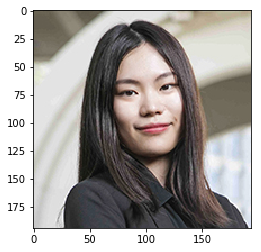

Female
Execution time =  0.6459460258483887


In [69]:
tic = time.time()
predict_sex('18_yixing_cai.jpg')
toc = time.time()-tic
print('Execution time = ',toc)

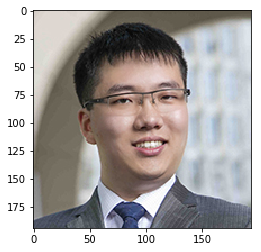

Age =  33
Execution time =  0.6571018695831299


In [70]:
tic = time.time()
predict_age('18_zibo_zhao.jpg')
toc = time.time()-tic
print('Execution time = ',toc)

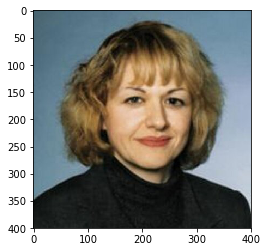

Age =  38
Execution time =  0.6885921955108643


In [60]:
tic = time.time()
predict_age('lindak.jpg')
toc = time.time()-tic
print('Execution time = ',toc)